# Desarrollo

Integrantes:\
    Christopher Gilbert \
    Manuel Sandoval

## Actividad 1

## Preguntas:
* [a](#a)
* [b](#b)
* [c](#c)
* [d](#d)
* [e](#e)
* [f](#f)
* [g](#g)
* [h](#h)
* [i](#i)
* [j](#j)
* [k](#k)
* [l](#l)
* [m](#m)
* [n](#n)
* [o](#o)
* [p](#p)
* [q](#p)
* [r](#p)
* [s](#s)
* [t](#t)
* [u](#u)
* [v](#v)
* [Actividad 2](#Actividad2)

# Import datos y separacion test-train

In [1]:
import pandas as pd
ftr = open("train_data.csv", "r",  encoding="ISO-8859-1")
rows = [line.split(" ",1) for line in ftr.readlines()]
df_train = pd.DataFrame(rows, columns=['Sentiment','Text'])
df_train['Sentiment'] = (pd.to_numeric(df_train['Sentiment'])+1)/2 # 0 o 1

fts = open("test_data.csv", "r",  encoding="ISO-8859-1")
rows = [line.split(" ",1) for line in fts.readlines()]
df_test = pd.DataFrame(rows, columns=['Sentiment','Text'])
df_test['Sentiment'] = (pd.to_numeric(df_test['Sentiment'])+1)/2 # 0 o 1

df_train_text = df_train.Text
df_test_text = df_test.Text
labels_train = df_train.Sentiment.values
labels_test = df_test.Sentiment.values

a)<a class="anchor" id="a"></a>

# Describir datos trabajados

In [2]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3554 entries, 0 to 3553
Data columns (total 2 columns):
Sentiment    3554 non-null float64
Text         3554 non-null object
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [3]:
df_train.head()

,Sentiment,Text
0,0.0,"everything's serious , poetic , earnest and --..."
1,0.0,"narratively , trouble every day is a plodding ..."
2,1.0,a truly wonderful tale combined with stunning ...
3,1.0,jason patric and ray liotta make for one splen...
4,0.0,haneke keeps us at arm's length . guided more ...


In [2]:
suma = 0
i = 0
for sentence in df_train['Text']:
    if i == 0:
        minimo = len(sentence)
        maximo = len(sentence)
    else:
        if minimo>len(sentence):
            minimo = len(sentence)
            min_sent = sentence
        if maximo<len(sentence):
            maximo = len(sentence)
            max_sent = sentence
    i+=1
    suma += len(sentence)
avg_len = suma/len(df_train['Text'])

In [5]:
(avg_len, minimo, maximo, min_sent)

(114.70709060213844, 7, 267, 'crummy\n')

In [6]:
df_test.head()

,Sentiment,Text
0,0.0,screenwriter dan schneider and director shawn ...
1,0.0,"home alone goes hollywood , a funny premise un..."
2,1.0,seldom has a movie so closely matched the spir...
3,0.0,"less dizzying than just dizzy , the jaunt is p..."
4,0.0,an ultra-low-budget indie debut that smacks mo...


In [3]:
suma = 0
i = 0
for sentence in df_test['Text']:
    if i == 0:
        minimo = len(sentence)
        maximo = len(sentence)
    else:
        if minimo>len(sentence):
            minimo = len(sentence)
            min_sent = sentence
        if maximo<len(sentence):
            maximo = len(sentence)
            max_sent = sentence
    i+=1
    suma += len(sentence)
avg_len = suma/len(df_train['Text'])

In [8]:
(avg_len, minimo, maximo, min_sent)

(116.4679234665166, 9, 268, 'horrible\n')

Para un mejor analisis preliminar seria de utilidad la eliminacion de las stopwords a la hora de poder determinar los largos maximo, minimo y el promedio del dataset

In [12]:
print("Train:")
print(df_train.groupby(['Sentiment']).count())
print("Train:")
print(df_test.groupby(['Sentiment']).count())

Train:
           Text
Sentiment      
0.0        1784
1.0        1770
Train:
           Text
Sentiment      
0.0        1803
1.0        1751


Se puede apreciar que en ambos datasets que existe una cantidad balanceada de registros por cada label

b)<a class="anchor" id="b"></a>

# Conjunto de validación

In [4]:
from sklearn.model_selection import train_test_split
df_train_text, df_val_text, labels_train, labels_val  = train_test_split(df_train, labels_train, test_size=0.2, random_state=0)

In [5]:
df_train_text.shape

(2843, 2)

In [6]:
df_val_text.shape

(711, 2)

c)<a class="anchor" id="c"></a>

# Stopwords

In [7]:
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
def base_word(word):
    wordlemmatizer = WordNetLemmatizer()
    return wordlemmatizer.lemmatize(word) 
def word_extractor(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    return words
... #try yourself
word_extractor("I love to eat cake")
word_extractor("I love eating cake")
word_extractor("I loved eating the cake")
word_extractor("I do not love eating cake")
word_extractor("I don't love eating cake")
... #try yourself
texts_train = [word_extractor(text[1]) for text in df_train_text.to_numpy()]
texts_val = [word_extractor(text[1]) for text in df_val_text.to_numpy()]
texts_test = [word_extractor(text[1]) for text in df_test.to_numpy()]

La importancia del preprocesamiento en el dominio del lenguaje natural radica en disminuir las palabras que si bien aparecen con mas frecuencia son las menos significantes para realizar analisis (las stopwords) para asi reducir ruido y tiempo de ejecucion. Tambien es importante el proceso de reducir las palabras a su origen con stemming o lematizacion para evitar analizar palabras cuya semantica es identica pero estan escritas diferentes producto de una conjugacion. En este caso se utiliza lematizacion ya que presenta mejores resultados que stemming al realizar el proceso considerando el contexto en el cual se encuentra la palabra.

d)<a class="anchor" id="d"></a>

# Representacion TF

In [8]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer.fit(texts_train)
features_train = vectorizer.transform(texts_train)
... #transform val and test


vectorizer2 = CountVectorizer(ngram_range=(1, 1), binary=False)
vectorizer2.fit(texts_val)
features_val = vectorizer.transform(texts_val)

vectorizer3 = CountVectorizer(ngram_range=(1, 1), binary=False)
vectorizer3.fit(texts_test)
features_test = vectorizer.transform(texts_test)

vocab = vectorizer.get_feature_names()
dist=list(np.array(features_train.sum(axis=0)).reshape(-1,))

vocab2 = vectorizer.get_feature_names()
dist2=list(np.array(features_val.sum(axis=0)).reshape(-1,))

vocab3 = vectorizer.get_feature_names()
dist3=list(np.array(features_test.sum(axis=0)).reshape(-1,))

most_common = pd.DataFrame({'word':vocab, 'frec': dist})
most_common.sort_values('frec', ascending=False).head(10)

,word,frec
2894,film,468
4954,movie,399
5245,one,208
3422,ha,200
4434,like,192
4607,make,156
7200,story,143
1200,character,136
2603,even,119
7649,time,118


Se aprecia que las palabras mas repetidas corresponden a las mas relacionadas al contexto de los comentarios, que viene siendo peliculas. Dentro del top 10 al menos no se aprecian palabras con alguna polaridad positiva o negativa excepto quizas "like", pero esta puede significar tanto "gustar" como tambien ser usada en un contexto comparativo. 

e)<a class="anchor" id="e"></a>

# LSA

In [9]:
sentiment = []
for s in labels_train:
    if s == 1:
        sentiment.append("Positivo")
    else:
        sentiment.append("Negativo")

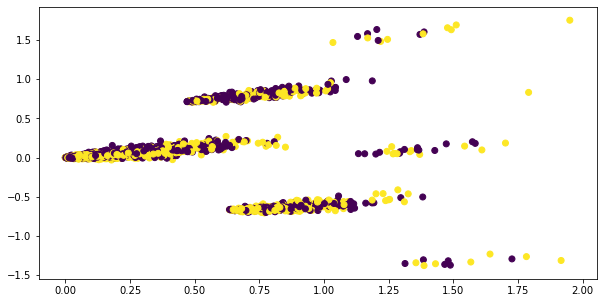

In [11]:
from sklearn.decomposition import TruncatedSVD #aka LSA
import matplotlib.pyplot as plt
model = TruncatedSVD(n_components=2)
model.fit(features_train)
x_plot = model.transform(features_train)
plt.figure(figsize=(10,5))
plt.scatter(x_plot[:,0], x_plot[:,1], c=labels_train)
plt.show()

In [23]:
np.where(x_plot == x_plot.max())

(array([1786], dtype=int64), array([0], dtype=int64))

In [24]:
x_plot[1786]

array([1.95011812, 1.75283113])

In [25]:
sentiment[1786]

'Positivo'

Amarillo Positivo, Morado Negativo

Las agrupaciones que se forman parecen contener una cantidad equitativa de positivo y negativo. Estas agrupaciones corresponden a las tematicas de las distintas criticas, pudiendo ser que cada agrupacion sea una pelicula distinta o que hablen sobre caracteristicas de las peliculas como la musica, los actores, etc. Estas agrupaciones se forman a partir de las palabras que componen las oraciones.

f)<a class="anchor" id="f"></a>

# Logistic Regressor

Param C=  0.0001
Param C=  0.001
Param C=  0.01
Param C=  0.1
Param C=  1.0
Param C=  10.0
Param C=  100.0
Param C=  1000.0


c:\users\chris\pyenviroments\machinelearning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


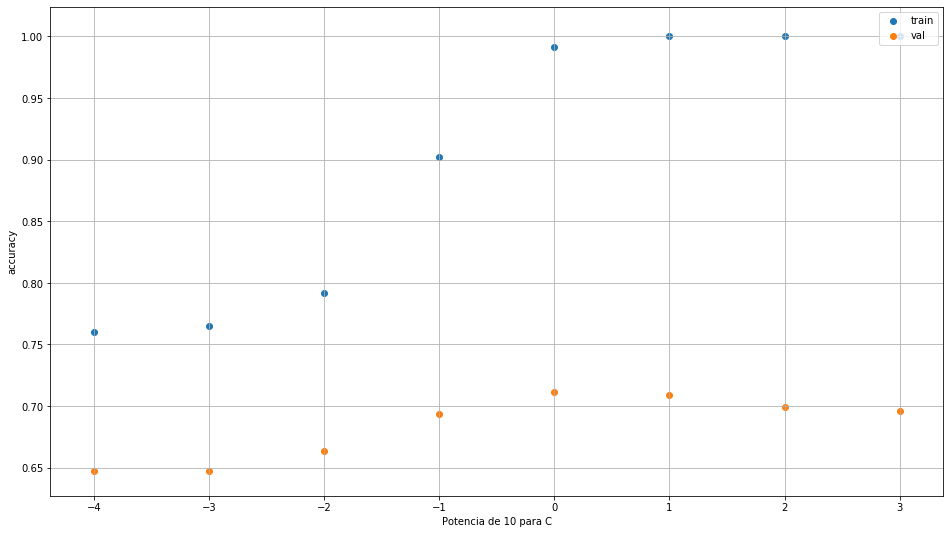

In [12]:
from sklearn.linear_model import LogisticRegression
from ipywidgets import interact, interactive, fixed, interact_manual

from sklearn.metrics import confusion_matrix
import seaborn as sn
%matplotlib inline
def do_LOGIT(x,y,xv,yv, param):
    print("Param C= ",param)
    model= LogisticRegression(penalty = 'l2')
    model.set_params(C=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
#Cs = [10**i for i in np.arange(-4,4)]
Cs = np.power(np.repeat(10., 8),np.arange(-4,4))
def interact_doLOGIT(Css):
    train_list =[]
    test_list=[]
    values=np.log10(Css)
    for p in Css:
        model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param= p )
        train_list.append(train_acc)
        test_list.append(test_acc)
        #print(train_list)
        #print(test_list)
     
    #print("train acc: ",train_acc)
    #print("val acc: ",test_acc)
    plt.figure(figsize = (16,9))
    plt.xlabel('Potencia de 10 para C')
    plt.ylabel('accuracy')
    plt.scatter(values, train_list, label= "train")
    plt.scatter(values, test_list, label = "val")
    plt.legend(loc="upper right")
    plt.grid()
    
#     #Train
#     lista_train = model.predict(features_train)
#     #
#     y_true_train = list(map(str,lista_train))
#     y_pred_train = list(map(str,labels_train))
#     data = confusion_matrix(y_true_train, y_pred_train)
#     df_cm = pd.DataFrame(data, columns=np.unique(y_true_train), index = np.unique(y_true_train))
#     df_cm.index.name = 'Actual'
#     df_cm.columns.name = 'Predicted Train'
#     plt.figure(figsize = (10,7))
#     sn.set(font_scale=1.2)#for label size
#     sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14})# font size
    
#     #Val
#     lista_val = model.predict(features_val)
#     #
#     y_true_val = list(map(str,lista_val))
#     y_pred_val = list(map(str,labels_val))
#     data = confusion_matrix(y_true_val, y_pred_val)
#     df_cm = pd.DataFrame(data, columns=np.unique(y_true_val), index = np.unique(y_true_val))
#     df_cm.index.name = 'Actual'
#     df_cm.columns.name = 'Predicted Val'
#     plt.figure(figsize = (10,7))
#     sn.set(font_scale=1.2)#for label size
#     sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14})# font size
    
# interact(interact_doLOGIT, Css=Cs)
interact_doLOGIT(Cs)

    

Es posible apreciar que el mejor valor de accuracy para el training set se obtiene con un C > 1 ya que se obtiene un 100%. Por otro lado, el mejor accuracy que se obtiene en el validation set corresponde a uno superior a 70%, posiblemente 71% el cual se logra con un C = 1 y que al aumentar produce una disminucion en el accuracy.

g)<a class="anchor" id="g"></a>

# SVM

Param C=  0.0001 Kernel=  linear
Param C=  0.001 Kernel=  linear
Param C=  0.01 Kernel=  linear
Param C=  0.1 Kernel=  linear
Param C=  1.0 Kernel=  linear
Param C=  10.0 Kernel=  linear
Param C=  100.0 Kernel=  linear
Param C=  1000.0 Kernel=  linear
Param C=  0.0001 Kernel=  rbf


c:\users\chris\pyenviroments\machinelearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Param C=  0.001 Kernel=  rbf


c:\users\chris\pyenviroments\machinelearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Param C=  0.01 Kernel=  rbf


c:\users\chris\pyenviroments\machinelearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Param C=  0.1 Kernel=  rbf


c:\users\chris\pyenviroments\machinelearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Param C=  1.0 Kernel=  rbf


c:\users\chris\pyenviroments\machinelearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Param C=  10.0 Kernel=  rbf


c:\users\chris\pyenviroments\machinelearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Param C=  100.0 Kernel=  rbf


c:\users\chris\pyenviroments\machinelearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Param C=  1000.0 Kernel=  rbf


c:\users\chris\pyenviroments\machinelearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


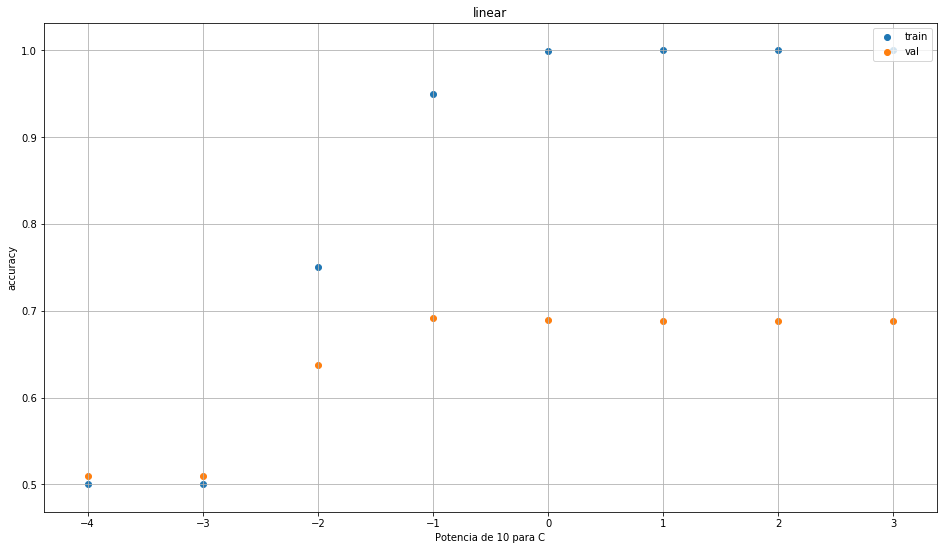

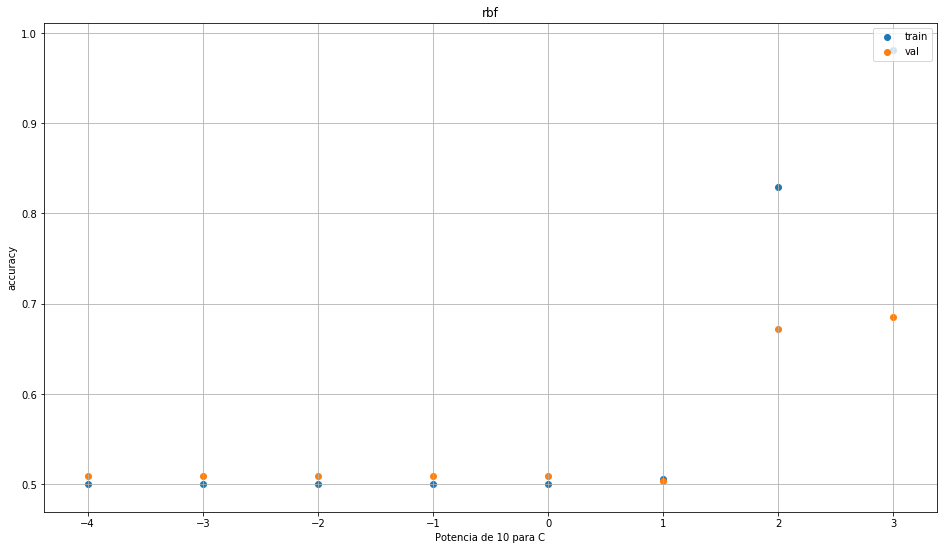

In [13]:
from sklearn.svm import SVC as SVM #SVC is for classification
def do_SVM(x,y,xv,yv, param, kernel='linear'):
    C = param
    print("Param C= ",C, 'Kernel= ', kernel)
    model= SVM()
    model.set_params(C=C,kernel=kernel) #try rbf and linear at least
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs = np.power(np.repeat(10., 8),np.arange(-4,4))

def interact_doSVM(Css, kernels):
    values=np.log10(Css)
    for kernel in kernels:
        train_list =[]
        test_list=[]
        for Cs in Css:
            model, train_acc, test_acc = do_SVM(features_train, labels_train, features_val, labels_val, param= Cs, kernel=kernel)
            train_list.append(train_acc)
            test_list.append(test_acc)
        plt.figure(figsize = (16,9))
        plt.xlabel('Potencia de 10 para C')
        plt.ylabel('accuracy')
        plt.scatter(values, train_list, label= "train")
        plt.scatter(values, test_list, label = "val")
        plt.title(kernel)
        plt.legend(loc="upper right")
        plt.grid()

    #Train
    # lista_train = model.predict(features_train)
    # #
    # y_true_train = list(map(str,lista_train))
    # y_pred_train = list(map(str,labels_train))
    # data = confusion_matrix(y_true_train, y_pred_train)
    # df_cm = pd.DataFrame(data, columns=np.unique(y_true_train), index = np.unique(y_true_train))
    # df_cm.index.name = 'Actual'
    # df_cm.columns.name = 'Predicted Train'
    # plt.figure(figsize = (10,7))
    # sn.set(font_scale=1.2)#for label size
    # sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14})# font size
    
    # #Val
    # lista_val = model.predict(features_val)
    # #
    # y_true_val = list(map(str,lista_val))
    # y_pred_val = list(map(str,labels_val))
    # data = confusion_matrix(y_true_val, y_pred_val)
    # df_cm = pd.DataFrame(data, columns=np.unique(y_true_val), index = np.unique(y_true_val))
    # df_cm.index.name = 'Actual'
    # df_cm.columns.name = 'Predicted Val'
    # plt.figure(figsize = (10,7))
    # sn.set(font_scale=1.2)#for label size
    # sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14})# font size

interact_doSVM(Css=Cs, kernels = ['linear', 'rbf'])


Con parametro de regularizacion C menor a 0.01 con kernel lineal, la SVM predice que todos los comentarios son negativos. Asi mismo ocurre con al utilizar el kernel rbf solo que para este caso el valor de C no puede ser menor a 10, pero aun con este valor, el accuracy de la SVM solo llega a ser del 50% por lo que es recomendable utilizar un valor mayor. Para el caso del kernel lineal con C igual a 0.01 se obtienen mejores resultados que rbf con 10, pero aun asi mejorables. Al aumentar el valor de C el accuracy para el training set mejora llegando a ser igual a 1 para valores de C > 1 pero para el caso de test set el valor llega a su maximo (69.2%) para C = 0.1 y con valores mayores va descendiendo hasta 68.7% para el caso de kernel linear, pero para rbf el maximo se encuentra con C = 1000 donde en test set alcanza alrededor de 68% de accuracy

h)<a class="anchor" id="h"></a>

# KNN

In [255]:
#from sklearn.neighbors import KNeighborsClassifier
#k_range = range(1, features_train.shape[0])
#scores = []
#for k in k_range:
#    knn = KNeighborsClassifier(n_neighbors = k)
#    knn.fit(features_train, labels_train)
#    scores.append(knn.score(features_val, labels_val))
#plt.figure(figsize = (16,9))
#plt.xlabel('k')
#plt.ylabel('accuracy')
#plt.scatter(k_range, scores)
#plt.xticks(np.arange(1, features_train.shape[0], 100)  )

In [256]:
#scores.index(max(scores))

El codigo comentado en las 2 celdas anteriores fue utilizado para obtener el valor optimo de vecinos que maximiza el accuracy. Debido al tiempo que demora en ejecutarse es que paso a comentarse.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
def do_KNN(x,y,xv,yv, param):
    model = KNeighborsClassifier()
    print("Param K= ",param)
    model.set_params(n_neighbors=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc

def interact_doKNN(Kss):
    model, train_acc, test_acc = do_KNN(features_train, labels_train, features_val, labels_val, param= Kss)
    print("train acc: ",train_acc)
    print("val acc: ",test_acc)
    
    # #Train
    # lista_train = model.predict(features_train)
    # #
    # y_true_train = list(map(str,lista_train))
    # y_pred_train = list(map(str,labels_train))
    # data = confusion_matrix(y_true_train, y_pred_train)
    # df_cm = pd.DataFrame(data, columns=np.unique(y_true_train), index = np.unique(y_true_train))
    # df_cm.index.name = 'Actual'
    # df_cm.columns.name = 'Predicted Train'
    # plt.figure(figsize = (10,7))
    # sn.set(font_scale=1.2)#for label size
    # sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14})# font size
    
    # #Val
    # lista_val = model.predict(features_val)
    # #
    # y_true_val = list(map(str,lista_val))
    # y_pred_val = list(map(str,labels_val))
    # data = confusion_matrix(y_true_val, y_pred_val)
    # df_cm = pd.DataFrame(data, columns=np.unique(y_true_val), index = np.unique(y_true_val))
    # df_cm.index.name = 'Actual'
    # df_cm.columns.name = 'Predicted Val'
    # plt.figure(figsize = (10,7))
    # sn.set(font_scale=1.2)#for label size
    # sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14})#

# Ks = np.arange(1, features_train.shape[0], 10)

interact_doKNN(Kss=427)#scores.index(max(scores)))
    

Param K=  427
train acc:  0.6429827646851917
val acc:  0.5921237693389592


Del valor de k-neighbors utilizados es posible decir que para determinar el sentimiento de una review se necesitan un quinto de los datos que presenten menor disancia (probablemente cosenoidal debido a la dimensionalidad) respecto a la review que se desea predecir para conseguir el mejor accuracy posible en el validation set.

i)<a class="anchor" id="i"></a>

# Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier as Tree
def do_Tree(x,y,xv,yv, param_d=None, param_m=2):
    model= Tree()
    print("Param Max-D= ",param_d, 'Min-samples-S= ', param_m)
    model.set_params(max_depth=param_d, min_samples_split=param_m) 
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc

def interact_doTree(Depth, Samples):
    model, train_acc, test_acc = do_Tree(features_train, labels_train, features_val, labels_val, param_d = Depth ,param_m = Samples)
    print("train acc: ",train_acc)
    print("val acc: ",test_acc)
    
    #Train
    lista_train = model.predict(features_train)
    #
    y_true_train = list(map(str,lista_train))
    y_pred_train = list(map(str,labels_train))
    data = confusion_matrix(y_true_train, y_pred_train)
    df_cm = pd.DataFrame(data, columns=np.unique(y_true_train), index = np.unique(y_true_train))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted Train'
    plt.figure(figsize = (10,7))
    sn.set(font_scale=1.2)#for label size
    sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14})# font size
    
    #Val
    lista_val = model.predict(features_val)
    #
    y_true_val = list(map(str,lista_val))
    y_pred_val = list(map(str,labels_val))
    data = confusion_matrix(y_true_val, y_pred_val)
    df_cm = pd.DataFrame(data, columns=np.unique(y_true_val), index = np.unique(y_true_val))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted Val'
    plt.figure(figsize = (10,7))
    sn.set(font_scale=1.2)#for label size
    sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14})#

Depths = np.arange(1, features_train.shape[1], 500 ) #choose steps
SamplesS = np.arange(2, features_train.shape[0] , 500 ) #choose steps
interact(interact_doTree, Depth = Depths, Samples = SamplesS )

interactive(children=(Dropdown(description='Depth', options=(1, 501, 1001, 1501, 2001, 2501, 3001, 3501, 4001,…

<function __main__.interact_doTree(Depth, Samples)>

Se puede apreciar que al realizar variaciones a la variable Samples el accuracy del arbol disminuye, esto puede ser debido a que al restringir la cantidad de muestras requeridas para seguir subdividiendo los nodos muchas quedan mal clasificadas. Para las opciones presentadas se obtuvo que con un Samples = 2 se obtenia el mejor resultado, pero puede ser que exista un mejor valor que se encuentre entre los valores que se presentan en el dropdown.

Por otro lado en la variable Depth, no se observa cambios significativos a la hora de aumentar la profundidad del arbol, aunque es importante destacar que al aumentar el valor se producia una disminucion de la accuracy, como lo fue para Depth = 5501 cuya accuracy era peor que para Depth = 501 en el validation set.

j)<a class="anchor" id="j"></a>

# ANN

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
def do_ANN(x,y, xv,yv, param):
    print("Neuron hidden = ",param)
    model = Sequential()
    model.add(Dense(units=param, input_dim=x.shape[1], activation="sigmoid"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x, y, epochs=25, batch_size=128, verbose=0)
    train_acc = model.evaluate(x,y, verbose=0)[1] #in position 0 is the loss
    test_acc = model.evaluate(xv,yv, verbose=0)[1]
    return model, train_acc, test_acc

def interact_doANN(paramm):
    train_list = []
    test_list=[]
    for i in paramm:
        model, train_acc, test_acc = do_ANN(features_train, labels_train, features_val, labels_val, param = i)
        print("train acc: ",train_acc)
        print("val acc: ",test_acc)
        train_list.append(train_acc)
        test_list.append(test_acc)
    plt.figure(figsize = (16,9))
    plt.xlabel('Neurons')
    plt.ylabel('accuracy')
    plt.scatter(paramm, train_list, label= "train")
    plt.scatter(paramm, test_list, label = "val")
    plt.legend(loc="upper right")
      
    
N_h = [2**i for i in range(1,10)]
neurons = np.asarray(N_h)
interact_doANN(N_h)    
#interact(interact_doANN, paramm = (2**i for i in range(1,10)))

Using TensorFlow backend.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\users\chris\pyenviroments\machinelearning\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "c:\users\chris\pyenviroments\machinelearning\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "c:\users\chris\pyenviroments\machinelearning\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Program Files\Python36\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Program Files\Python36\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: Error en una rutina de inicialización de biblioteca de vínculos dinámicos (D

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\users\chris\pyenviroments\machinelearning\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "c:\users\chris\pyenviroments\machinelearning\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "c:\users\chris\pyenviroments\machinelearning\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Program Files\Python36\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Program Files\Python36\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: Error en una rutina de inicialización de biblioteca de vínculos dinámicos (D

TypeError: must be str, not list

<img src="resultado_NN.png"></img>

Debido a problemas con Tensorflow este item fue desarrollado en Google Colab y luego se copio el codigo junto al resultado obtenido.

Del grafico es posible observar que en el training set la red logra alcanzar como mejor accuracy alrededor de un 73% al utilizar 8 neuronas en la capa oculta y a medida que se iban aumentando el accuracy comenzó a disminuir llegando incluso a 50%, comparable a lanzar una moneda.

Por otro lado para el validation set se obtiene que el mayor valor de accuracy tambien se obtiene para 8 neuronas pero este es considerablemente mas bajo que el de training ya que solo llega a casi alcanzar el 65%.

k)<a class="anchor" id="k"></a>

# Mejor Modelo

De todos los modelos utilizados el que mejor desempeño presento en el conjunto de validacion corresponde al modelo de regresion logistica con parametro de regularizacion "C" igual a 1 donde se presenta un accuracy de 71% para el validation set, por lo que se procede a revisar su desempeño con el test set.

In [259]:
model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param= 1.0 )

Param C=  1.0


c:\users\chris\pyenviroments\machinelearning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [260]:
model.score(features_test, labels_test)

0.7146876758581879

Se puede apreciar que en el test set tambien se obtiene un valor de accuracy similar al del validation set. Este valor resulta bastante positivo teniendo en cuenta que se esperaba obtener un valor mas bajo que en el caso del validation set.

l)<a class="anchor" id="l"></a>

# Vader

In [261]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
def vader_predict(sentences): 
    sid_obj = SentimentIntensityAnalyzer() 
    sent_v = []
    count = 0 #para contar palabras iguales
    for text in sentences:
        sentiment_dict = sid_obj.polarity_scores(text) 
        if sentiment_dict["pos"] > sentiment_dict["neg"]: #based on scores
            sent_v.append(1)
        else:
            if sentiment_dict["pos"] == sentiment_dict["neg"]:
                  count = count + 1
            sent_v.append(0)
    print("palabras con igual intensidad: " + str(count))
    return np.asarray(sent_v)
vader_pred_test = vader_predict(df_test_text)
#vader_pred_test = vader_predict(text_test) #prueba sin stopwords
from sklearn.metrics import accuracy_score
accuracy_score(labels_test, vader_pred_test)

palabras con igual intensidad: 547


0.6359032076533483

Se puede observar que al utilizar el modelo Vader se obtiene un valor más bajo de accuracy que el obtenido utilizando la regresión logística. Esto puede deberse a que en el caso que la intensidad de la frase sea igualmente positiva que negativa, esta es catalogada como negativa por el codigo de la celda anterior, por lo que puede darse el caso que existan frases que deben ser positivas dentro de ese conjunto.

m)<a class="anchor" id="m"></a>

# Comparacion Vader - Regressor 

Tomando en cuenta que el modelo que presento mejor desempeño es el de Regresion Logistica, se procedera a seguir utilizando en este apartado dado que es un modelo que realiza predicciones probabilisticas

In [262]:
V = len(vocab)
word_scores = np.zeros((V, 2))
for i in range(V):
    x_word = np.zeros((1, V))
    x_word[:,i] = 1 # only the "i" word appeared
    word_scores[i] = model.predict_proba(x_word)
vocab

['10',
 '100',
 '101',
 '105',
 '10th',
 '11',
 '110',
 '11th',
 '13',
 '13th',
 '14',
 '146',
 '15',
 '16',
 '163',
 '170',
 '18th',
 '19',
 '1915',
 '1934',
 '1938',
 '1940s',
 '1950',
 '1950s',
 '1954',
 '1955',
 '1958',
 '1959',
 '1960s',
 '1972',
 '1975',
 '1978',
 '1979',
 '1980',
 '1992',
 '1995',
 '19th',
 '20',
 '2000',
 '2002',
 '20th',
 '21st',
 '22',
 '24',
 '25',
 '25s',
 '30',
 '300',
 '3000',
 '30s',
 '37',
 '3d',
 '40',
 '400',
 '401',
 '40s',
 '451',
 '48',
 '4ever',
 '50',
 '51',
 '53',
 '5ths',
 '60s',
 '65',
 '65th',
 '70s',
 '71',
 '77',
 '78',
 '79',
 '80',
 '800',
 '80s',
 '84',
 '85',
 '88',
 '8th',
 '90',
 '90s',
 '94',
 '95',
 '96',
 '99',
 'aaliyah',
 'abandon',
 'abandono',
 'abbreviated',
 'abc',
 'abel',
 'abhorrent',
 'ability',
 'able',
 'ably',
 'aboul',
 'above',
 'abrahams',
 'abrasive',
 'abroad',
 'abruptly',
 'absolute',
 'absolutely',
 'absorb',
 'absorbed',
 'absorbing',
 'absorption',
 'abstract',
 'absurd',
 'absurdist',
 'absurdity',
 'abuse',

In [263]:
word_scores

array([[0.44490945, 0.55509055],
       [0.63665779, 0.36334221],
       [0.48037753, 0.51962247],
       ...,
       [0.50078706, 0.49921294],
       [0.49980275, 0.50019725],
       [0.57915321, 0.42084679]])

In [264]:
len(vocab)

8541

In [265]:
five_neg = np.sort(word_scores.view('float64,float64'), order=['f1'], axis=0)[:5]

In [266]:
five_neg.tolist()

[[(0.8560070368633268, 0.1439929631366732)],
 [(0.8385242792610248, 0.1614757207389752)],
 [(0.8362318540583138, 0.16376814594168615)],
 [(0.8334846032745392, 0.1665153967254608)],
 [(0.8328677501230323, 0.1671322498769677)]]

In [267]:
five_pos = np.sort(word_scores.view('float64,float64'), order=['f0'], axis=0)[:5]

In [268]:
five_pos.tolist()

[[(0.1821982733787374, 0.8178017266212626)],
 [(0.23727185614495638, 0.7627281438550436)],
 [(0.23791880136993304, 0.762081198630067)],
 [(0.24410715666922478, 0.7558928433307752)],
 [(0.24675746897918704, 0.753242531020813)]]

In [269]:
word_scores.tolist().index([0.8560070368633268, 0.1439929631366732])

1334

In [270]:
pos_words = []
neg_words = []

for values in five_pos.tolist():
    ind = word_scores.tolist().index(list(values[0]))
    pos_words.append(vocab[ind])
    
for values in five_neg.tolist():
    ind = word_scores.tolist().index(list(values[0]))
    neg_words.append(vocab[ind])

In [271]:
pos_words

['world', 'solid', 'heart', 'rare', 'moving']

In [272]:
neg_words

['cliche', 'worst', 'dull', 'bad', 'boring']

In [273]:
vocab.index("awesome")

585

In [274]:
word_scores[585]

array([0.38742827, 0.61257173])

Para ambos casos se optó por obtener el top 5 y tanto en las palabras positivas como negativas obtenidas se observa que a nivel semántico no parecen palabras con una intensidad muy grande en sus respectivos sentimiento, por ejemplo la palabra "world" que viene siendo la mas positiva dentro de su conjunto, no es una palabra que denote mucho positivismo si se compara con "good", "beautiful" o "awesome". Esto da para pensar que de forma individual el modelo de regresion logistica con parametro de regularizacion C=1.0 puede no ser adecuado para realizar el trabajo, aun cuando al analizar frases tenga el mejor desempeño.

n)<a class="anchor" id="n"></a>

# Stemming en vez de Lemmatizer

In [275]:
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
from nltk.stem.porter import PorterStemmer
def base_word(word):
    wordstemmer = PorterStemmer()
    return wordstemmer.stem(word)
def word_extractor(text):
    wordstemmer = PorterStemmer()
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
        
    return words
... #try yourself
word_extractor("I love to eat cake")
word_extractor("I love eating cake")
word_extractor("I loved eating the cake")
word_extractor("I do not love eating cake")
word_extractor("I don't love eating cake")
... #try yourself
texts_train = [word_extractor(text[1]) for text in df_train_text.to_numpy()]
texts_val = [word_extractor(text[1]) for text in df_val_text.to_numpy()]
texts_test = [word_extractor(text[1]) for text in df_test.to_numpy()]

In [276]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer.fit(texts_train)
features_train = vectorizer.transform(texts_train)
... #transform val and test


vectorizer2 = CountVectorizer(ngram_range=(1, 1), binary=False)
vectorizer2.fit(texts_val)
features_val = vectorizer.transform(texts_val)

vectorizer3 = CountVectorizer(ngram_range=(1, 1), binary=False)
vectorizer3.fit(texts_test)
features_test = vectorizer.transform(texts_test)

vocab = vectorizer.get_feature_names()
dist=list(np.array(features_train.sum(axis=0)).reshape(-1,))

vocab2 = vectorizer.get_feature_names()
dist2=list(np.array(features_val.sum(axis=0)).reshape(-1,))

vocab3 = vectorizer.get_feature_names()
dist3=list(np.array(features_test.sum(axis=0)).reshape(-1,))

In [277]:
model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param= 1.0 )

Param C=  1.0


c:\users\chris\pyenviroments\machinelearning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [278]:
model.score(features_test, labels_test)

0.7259425998874508

Como se puede apreciar, al realizar el proceso de Stemming se consigue un accuracy mayor en el test set en el regresor logistico con parametro de regularizacion C= 1.0. El aumento es de un 1% respecto al obtenido en el apartado [k](#k). Esto resulta curioso considerando que lemmatization considera el contexto a la hora de realizar la reduccion a la raiz, mientras que stemming lo realiza considerando las palabras de forma individual, por lo que se pensaría inicialmente que utilizando el primero se obtendrian mejores resultados. Ahora el uso de stemming produce que al reducir una palabra en contextos diferentes se obtenga el mismo resultado, disminuyendo asi la cantidad de palabras que el TF consideraria, pudiendo ser esta la causa de un mejor desempeño.

o)<a class="anchor" id="o"></a>

# TF-IDF

In [279]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer(binary=False, ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, norm='l2', use_idf=True, sublinear_tf=False)

tfidf_model.fit(texts_train)
features_train = tfidf_model.transform(texts_train)

#tfidf_model.fit(texts_val)
features_val = tfidf_model.transform(texts_val)

#tfidf_model.fit(texts_test)
features_test = tfidf_model.transform(texts_test)

In [280]:
model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param= 1.0 )

Param C=  1.0


c:\users\chris\pyenviroments\machinelearning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [281]:
train_acc

0.9331691874780161

In [282]:
test_acc

0.6947960618846695

In [283]:
model.score(features_test, labels_test)

0.7386043894203714

Utilizando TF-IDF se obtienen mejores resultados con el modelo de regresion logistica, aumentando el accuracy nuevamente llegando asi a un 74%. Se testeo cambiando parametros en el vecotirzador para utilizar unigramas y bigramas, y si bien el accuracy en training y en validacion suben, en testing disminuyen, por lo que se decide optar por solo dejar el uso de unigramas. Tambien se probo utilizando solo bigramas, pero el resultado de test set disminuyo por debajo del 60%. 

p)<a class="anchor" id="p"></a>

# Analsis Detallado

In [284]:
from sklearn.metrics import classification_report
def score_the_model(model, x, y):
    print("Detailed Analysis Testing Results ...")
    print(classification_report(y, model.predict(x), target_names=['-','+']))
score_the_model(model, features_test, labels_test )

Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.74      0.74      0.74      1803
           +       0.73      0.74      0.73      1751

    accuracy                           0.74      3554
   macro avg       0.74      0.74      0.74      3554
weighted avg       0.74      0.74      0.74      3554



De las metricas auxiliares es posible notar que a pesar de que el modelo presenta un buen desempeño aun tiene falencias leves a la hora de clasificar muestras en las categorias correctas. Lo que si es destacable es que presenta un rendimiento igual en ambas categorias por lo que no es un problema respecto a que una de ellas tenga mayor importancia que la otra y en ambos casos la cantidad de falsos positivos y falsos negativos no es alta.

Ademas, el valor de soporte para ambas clases tambien se aprecia balanceado, por lo que se puede entender que los resultados no se encuentran sesgados debido a dichas cantidades.

q)<a class="anchor" id="q"></a>

# Class Weight

In [225]:
classes_weights = {0: 5, 1: 1} #or choose..
model.set_params(class_weight=classes_weights)
model.fit(features_train, labels_train)
score_the_model(model, features_test, labels_test)

Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.55      0.99      0.71      1803
           +       0.94      0.16      0.28      1751

    accuracy                           0.58      3554
   macro avg       0.75      0.58      0.49      3554
weighted avg       0.74      0.58      0.50      3554



Realizando el cambio de pesos fue posible aumentar el recall del modelo en las etiquetas negativas, lo que se traduce en un aumento en la capacidad que tiene este de acertar a la hora de clasificar los elementos que deberian tener esa etiqueta. Lamentablemente al aumentar el peso de la etiqueta negativa se obtiene una disminucion en el recall de los positivos llegando a ser 0.16 que resulta ser un valor demasiado bajo. Es por los mismo que la precision de la clase positiva sube debido a que al tener mayor importancia el label negativo, es mas dificil que se etiquete como positivo una muestra que es negativa.

r)<a class="anchor" id="r"></a>

# Prediccion continua o categórica

In [231]:
test_pred = model.predict_proba(features_test) #or ".predict"
spl = np.random.randint( 0, len(test_pred), size=15)
for text, pred_s, true_s in zip(df_test_text[spl], test_pred[spl], labels_test[spl]):
    print("True sent: ", true_s, "-- Pred sent: ",pred_s)
    print("Raw text: ", text)

True sent:  0.0 -- Pred sent:  [0.39347299 0.60652701]
Raw text:  best described as i know what you did last winter .

True sent:  0.0 -- Pred sent:  [0.62999398 0.37000602]
Raw text:  the script was reportedly rewritten a dozen times -- either 11 times too many or else too few .

True sent:  1.0 -- Pred sent:  [0.34377353 0.65622647]
Raw text:  . . . a haunting vision , with images that seem more like disturbing hallucinations .

True sent:  1.0 -- Pred sent:  [0.44049946 0.55950054]
Raw text:  it's not going to be everyone's bag of popcorn , but it definitely gives you something to chew on .

True sent:  0.0 -- Pred sent:  [0.5010758 0.4989242]
Raw text:  there's only one way to kill michael myers for good : stop buying tickets to these movies .

True sent:  0.0 -- Pred sent:  [0.67497953 0.32502047]
Raw text:  a really funny fifteen-minute short stretched beyond its limits to fill an almost feature-length film .

True sent:  1.0 -- Pred sent:  [0.45782676 0.54217324]
Raw text:  hear

Las ventajas de una prediccion continua resultan beneficiosas a la hora de querer estudiar mas clases como lo hce Vader que categoriza en 5 intensidades (muy negativo, negativo, neutro , positivo y muy positivo), mientras que la prediccion categorica resulta util para estudios mas generales respecto a las criticas que en este caso se estudiaron.

s)<a class="anchor" id="s"></a>

De todos los modelos utilizados a lo largo del desarrollo de la actividad el que presento mejor desempeño resulto ser el regresor logistico con un accuracy sobre el 70% seguido por la SVM con kernel linear que tiene un accuracy cercano a 70% pero esta ligeramente por debajo. Teniendo en cuenta que en todos los modelos se realizaron cambios de parametros para ver si se lograba un mejor accuracy, lo mas probable que es que la gran diferenciacion resulte ser la representacion.

En lo personal el modelo de Regresion logistica resulta ser uno de los mas comodos de utilizar debido a su bajo tiempo de ejecucion que permite realizar pruebas mas rapidamente y su facil forma de realizar la variacion de parametro al ser uno solo, no como en el caso del arbol de decision que cuenta con el parametro de profundidad y minimo de datos en la muestra para realizar la division en un nodo.

# ACTIVIDAD 2 <a class="anchor" id="Actividad2"></a>

In [1]:
import pandas as pd
df = pd.read_csv("./sentiment_polarity/mturk_answers.csv") 

In [2]:
df.head()

,WorkerId,Input.id,Input.original_sentence,Input.stemmed_sent,Input.true_sent,Answer.sent
0,A2HD5XMM48KKJW,4518,"the cast is phenomenal , especially the women .",cast phenomen especi women,pos,pos
1,A2HD5XMM48KKJW,10415,"the metaphors are provocative , but too often ...",metaphor provoc often viewer left puzzl mechan...,neg,neg
2,A2HD5XMM48KKJW,7098,while there's something intrinsically funny ab...,there someth intrins funni sir anthoni hopkin ...,neg,pos
3,A2HD5XMM48KKJW,4396,a harrowing account of a psychological breakdo...,harrow account psycholog breakdown,pos,neg
4,A2HD5XMM48KKJW,2812,". . . a visually seductive , unrepentantly tr...",visual seduct unrepentantli trashi rice instal...,pos,pos


In [3]:
import numpy as np
EMBEDDING_DIM = 300
GLOVE_FILE = "./glove.6B.%dd.txt"%(EMBEDDING_DIM)
embeddings_index = {}
with open(GLOVE_FILE, encoding="utf8") as file:
    for line in file:
        values = line.split()
        embeddings_index[values[0]] = np.asarray(values[1:], dtype='float32')



Se realiza el mapeo de 'pos' y 'neg' a 1 y 0 respectivamente para luego proceder a calcular los mas votados segun el enfoque (MVhard) expuesto en el paper de Rodrigues 

In [4]:
df.loc[df['Answer.sent'] == 'pos', 'Answer.sent'] = 1
df.loc[df['Answer.sent'] == 'neg', 'Answer.sent'] = 0
df.loc[df['Input.true_sent'] == 'pos', 'Input.true_sent'] = 1
df.loc[df['Input.true_sent'] == 'neg', 'Input.true_sent'] = 0

In [5]:
df.head()

,WorkerId,Input.id,Input.original_sentence,Input.stemmed_sent,Input.true_sent,Answer.sent
0,A2HD5XMM48KKJW,4518,"the cast is phenomenal , especially the women .",cast phenomen especi women,1,1
1,A2HD5XMM48KKJW,10415,"the metaphors are provocative , but too often ...",metaphor provoc often viewer left puzzl mechan...,0,0
2,A2HD5XMM48KKJW,7098,while there's something intrinsically funny ab...,there someth intrins funni sir anthoni hopkin ...,0,1
3,A2HD5XMM48KKJW,4396,a harrowing account of a psychological breakdo...,harrow account psycholog breakdown,1,0
4,A2HD5XMM48KKJW,2812,". . . a visually seductive , unrepentantly tr...",visual seduct unrepentantli trashi rice instal...,1,1


Para obtener que fue lo mas votado por las personas en cuanto al sentimiento de cada oracion se procede a agrupar los datos segun Id de la oracion para calcular el promedio de los sentimientos y posteriormente redondearlos. Ademas se procede a cambiar el dataframe por el agrupado debido a que se eliminan columas innecesarias como las de WorkerID y la oracion original.

In [6]:
df = df.groupby(['Input.id', 'Input.stemmed_sent'], as_index = False).mean().round(0) 

luego se realiza la separacion entre training set y test set para el entrenamiento del Regresor Logistico

In [80]:
df = df.sample(frac=1).reset_index(drop=True) #aleatoriedad en el dataset
test_set = df[:int(len(df)*0.2)] 
train_set = df[int(len(df)*0.2):] 

In [82]:
df.head()

,Input.id,Input.stemmed_sent,Input.true_sent,Answer.sent
0,6236,loud low budget tire formula film arriv cloak ...,0.0,0.0
1,8186,awfulli deriv stori,0.0,0.0
2,3078,dont feel bit asham admit enjoy came expens se...,1.0,1.0
3,2726,hedonist gusto,1.0,0.0
4,5870,zoe clark williamss lacklust thriller best fri...,0.0,0.0


In [83]:
def dataset_to_features(dataset):
    lista = []
    for sentence in dataset["Input.stemmed_sent"]:
        sentence_vector = np.zeros(300)
        for word in sentence:
            if embeddings_index.get(word) is not None:
                sentence_vector = sentence_vector + embeddings_index.get(word)
        lista.append(sentence_vector)
    return lista

In [84]:
train = dataset_to_features(train_set)

In [85]:
test = dataset_to_features(test_set)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


y_train = train_set['Answer.sent'].values
y_test = test_set['Answer.sent'].values

for c in [0.25, 0.5, 1, 1.05, 1.25]:
    lr = LogisticRegression(C=c)
    lr.fit(train, y_train)
    print (f"Accuracy C={c}: {accuracy_score(y_test, lr.predict(test))}")

c:\users\chris\pyenviroments\machinelearning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy C=0.25: 0.5705705705705706


c:\users\chris\pyenviroments\machinelearning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy C=0.5: 0.5705705705705706


c:\users\chris\pyenviroments\machinelearning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy C=1: 0.5705705705705706


c:\users\chris\pyenviroments\machinelearning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy C=1.05: 0.5705705705705706


c:\users\chris\pyenviroments\machinelearning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy C=1.25: 0.5715715715715716


Al ver que los resultados no son buenos (no son mucho mejores que lanzar una moneda) se utilizara el promedio de la suma de los vectores obtenidos de las palabras de las oraciones

In [87]:
def dataset_to_featuresv2(dataset):
    lista = []
    for sentence in dataset["Input.stemmed_sent"]:
        sentence_vector = np.zeros(300)
        n_words = 0
        for word in sentence.split():
            n_words += 1
            if embeddings_index.get(word) is not None:
                sentence_vector = sentence_vector + embeddings_index.get(word)
        #print(sentecen_vector)
        sentence_vector = sentence_vector / n_words
        #print(sentence_vector)
        lista.append(sentence_vector)
    return lista

In [88]:
train = dataset_to_featuresv2(train_set)
test = dataset_to_featuresv2(test_set)

In [89]:
y_train = train_set['Answer.sent'].values
y_test = test_set['Answer.sent'].values

for c in np.power(np.repeat(10., 8),np.arange(-4,4)):
    lr = LogisticRegression(C=c)
    lr.fit(train, y_train)
    print (f"Accuracy C={c}: {accuracy_score(y_test, lr.predict(test))}")

c:\users\chris\pyenviroments\machinelearning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\chris\pyenviroments\machinelearning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\chris\pyenviroments\machinelearning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy C=0.0001: 0.5325325325325325
Accuracy C=0.001: 0.5965965965965966
Accuracy C=0.01: 0.6446446446446447


c:\users\chris\pyenviroments\machinelearning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\chris\pyenviroments\machinelearning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy C=0.1: 0.6716716716716716
Accuracy C=1.0: 0.6816816816816816


c:\users\chris\pyenviroments\machinelearning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy C=10.0: 0.6586586586586587


c:\users\chris\pyenviroments\machinelearning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy C=100.0: 0.6656656656656657


c:\users\chris\pyenviroments\machinelearning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy C=1000.0: 0.6626626626626627


Se observa una mejora muy considerable al utilizar el promedio de la suma de vectores de palabras que componen una oración. Inicialmente se pensaba que bastaba con utilizar la suma de vectores puesto que una de las dimensiones podia representar la polaridad de las palabras por lo que la suma podria ser suficiente a la hora de entrenar un regresor logístico. 

Utilizando los mismos valores que en la Actividad 1 es posible apreciar que con parametros de regularizacion C muy bajos se obtienen malos resultados mientras que el peak de desempeño se obtiene con un C=1.0 tendiendo a bajar con valores muy grandes